In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.misc

In [2]:
def pca_projection(df, n_components):
    '''
    Projects data onto first n principal components in increasing order
    of eigenvalues and prints energy preserved
    Input:
        df - pandas dataframe containing 2D data
        n_components - number of principal components to use
    Output:
        proj - projection of df onto first n_components PCs
        v - right singular vectors transposed
    '''
    # subtract mean from data
    df = df - df.mean(axis=0)
    # SVD decomposition (in decreasing order of eigenvalues)
    u, s, v = np.linalg.svd(df, full_matrices=False)
    # calculate energy preserved in first n_components
    energy = np.round(np.sum(s[:n_components]) / np.sum(s) * 100, 2)
    print("Energy: ", energy, "%")
    # set eigenvalues of unused components to 0
    s[n_components:] = 0
    # compute projection of data onto PCs
    proj = u @ np.diag(s)
    return proj, v

def pca_2d_reconstruction(df, n_components):
    '''
    Performs PCA reconstruction of 2D data
    Input:
        df - pandas dataframe containing 2D data
        n_components - number of principal components to use
    Output:
        proj @ v - reconstructed data
    '''
    # get projection of data onto PCs, eigenvectors and energies
    proj, v = pca_projection(df, n_components)
    # calculate and return reconstruction and energy
    return proj @ v

def pca_3d_reconstruction(df, n_components):
    '''
    Performs PCA reconstruction of 3D data separately on each
    3rd dimension (for this exercise 3rd dimension corresponds
    to RGB channels of image)
    Input:
        df - pandas dataframe containing 3D data
        n_components - number of principal components to use
    Output:
        reconst - reconstructed data in 3D
    '''
    reconstr= np.zeros(df.shape) # init df to keep new reconstucted data
    # iterate through each channel in 3rd dimension
    for ch in range(df.shape[2]):
        # get projection of data onto PCs, eigenvectors and energies
        reconstr[:, :, ch] = pca_2d_reconstruction(df[:, :, ch], n_components)
    return reconstr

In [3]:
plt.rcParams.update({'font.size': 12})

# Part 1

In [37]:
df = pd.read_csv('pca_dataset.txt', header=None, delimiter=' ')

Text(0, 0.5, 'f(x)')

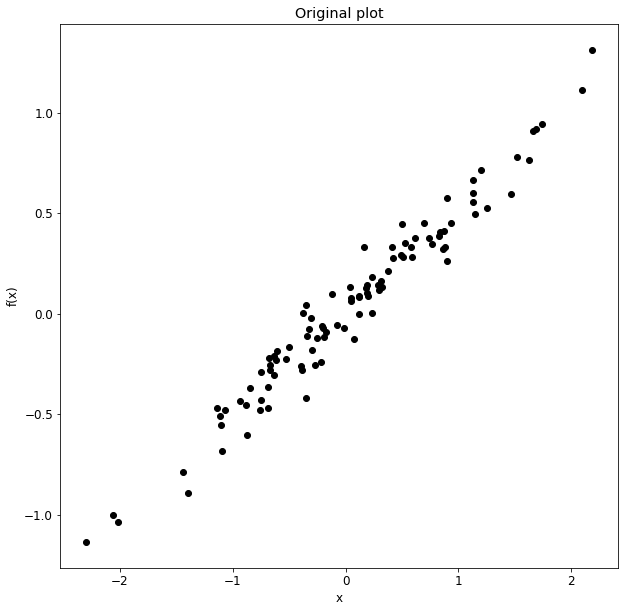

In [38]:
# plot original data
plt.figure(figsize=(10, 10))
plt.scatter(df[0], df[1], color='k')
plt.title("Original plot")
plt.xlabel("x")
plt.ylabel("f(x)")

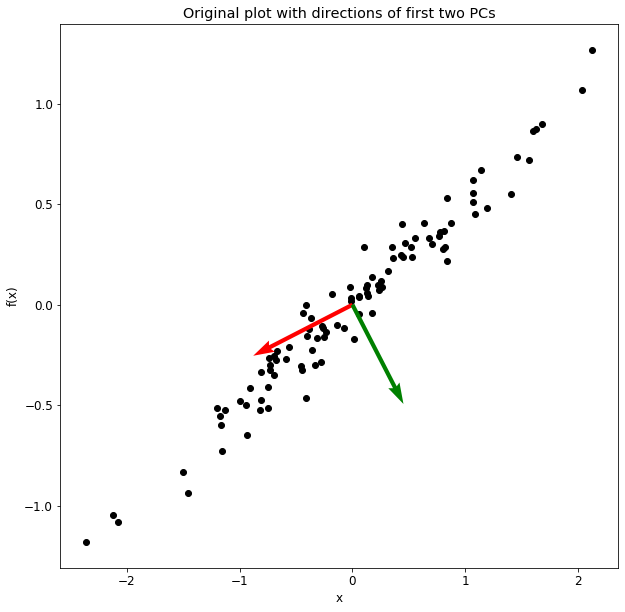

In [39]:
df = df - df.mean(axis=0)
_, _, v = np.linalg.svd(df)
plt.figure(figsize=(10, 10))
plt.scatter(df[0], df[1], color='k')
plt.quiver([0, 0], [0, 0], v[:, 0], v[:, 1], color=['r', 'g'], scale=5)
plt.title("Original plot with directions of first two PCs")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [40]:
# first comp energy
print(round(s[0] / np.sum(s) * 100, 2), '%')
# second comp energy
print(round(s[1] / np.sum(s) * 100, 2), '%')

92.33 %
7.67 %


# Part 2

In [28]:
df = scipy.misc.face()

Text(0.5, 1.0, 'Original image')

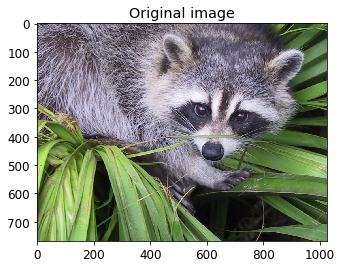

In [29]:
plt.imshow(df)
plt.title("Original image")

Energy:  100.0 %
Energy:  100.0 %


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Energy:  100.0 %


Text(0.5, 1.0, 'Reconstructed image with 768 PCs')

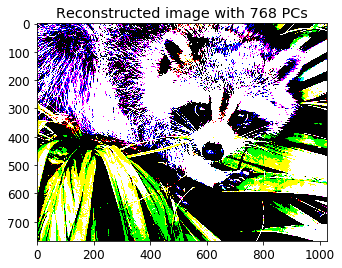

In [30]:
df_full = pca_3d_reconstruction(df, df.shape[0])
plt.imshow(df_full)
plt.title("Reconstructed image with 768 PCs")

Energy:  71.26 %
Energy:  72.35 %
Energy: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 71.68 %


Text(0.5, 1.0, 'Reconstructed image with 120 PCs')

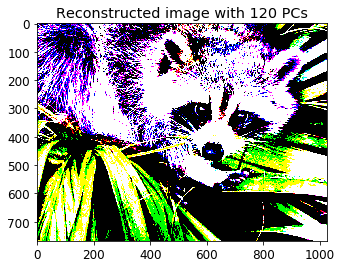

In [13]:
df_120 = pca_3d_reconstruction(df, 120)
plt.imshow(df_120)
plt.title("Reconstructed image with 120 PCs")

Energy:  49.62 %
Energy:  51.16 %
Energy: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 50.54 %


Text(0.5, 1.0, 'Reconstructed image with 50 PCs')

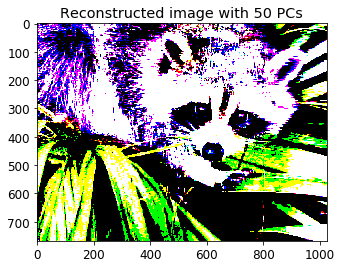

In [14]:
df_50 = pca_3d_reconstruction(df, 50)
plt.imshow(df_50)
plt.title("Reconstructed image with 50 PCs")

Energy:  24.62 %
Energy:  25.12 %


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Energy:  26.14 %


Text(0.5, 1.0, 'Reconstructed image with 10 PCs')

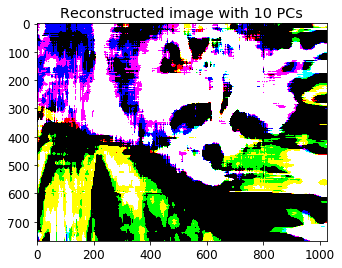

In [15]:
df_10 = pca_3d_reconstruction(df, 10)
plt.imshow(df_10)
plt.title("Reconstructed image with 10 PCs")

Energy:  99.18 %
Energy:  99.25 %
Energy: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 99.05 %
66.41 % of data preserves > 99% of energy


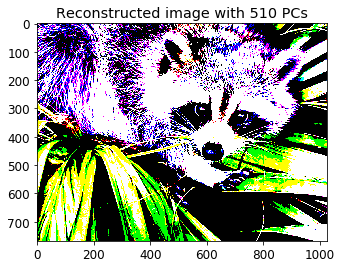

In [16]:
# > 99% energy
df_n = pca_3d_reconstruction(df, 510)
plt.imshow(df_n)
plt.title("Reconstructed image with 510 PCs")
print(np.round(510 / df.shape[0] * 100, 2), "% of data preserves > 99% of energy")

# Part 3

In [12]:
df = pd.read_csv('data_DMAP_PCA_vadere.txt', header=None, delimiter=' ')

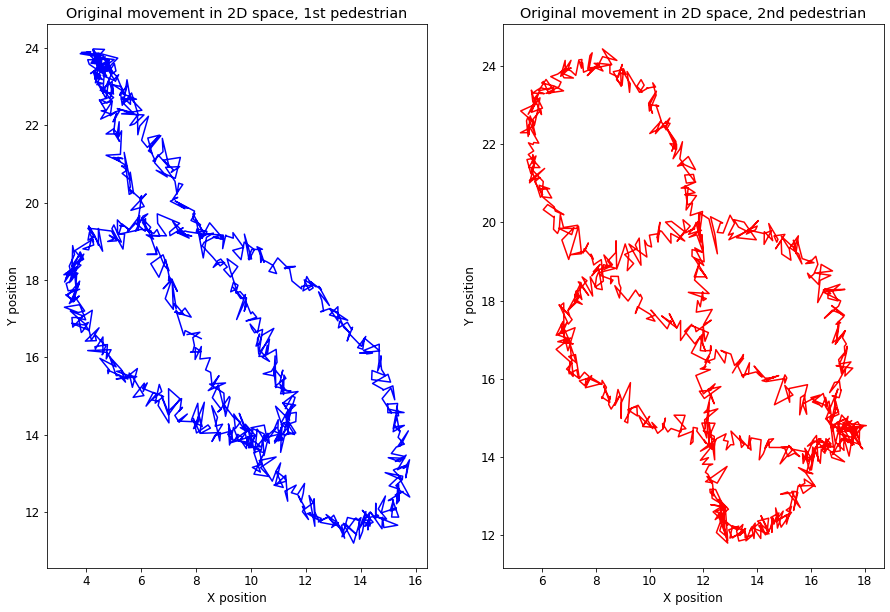

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
ax1.plot(df.iloc[:, 0], df.iloc[:, 1], color='b')
ax1.set_title("Original movement in 2D space, 1st pedestrian")
ax1.set_xlabel("X position")
ax1.set_ylabel("Y position")
ax2.plot(df.iloc[:, 2], df.iloc[:, 3], color='r')
ax2.set_title("Original movement in 2D space, 2nd pedestrian")
ax2.set_xlabel("X position")
ax2.set_ylabel("Y position")
plt.show()

Energy:  66.28 %


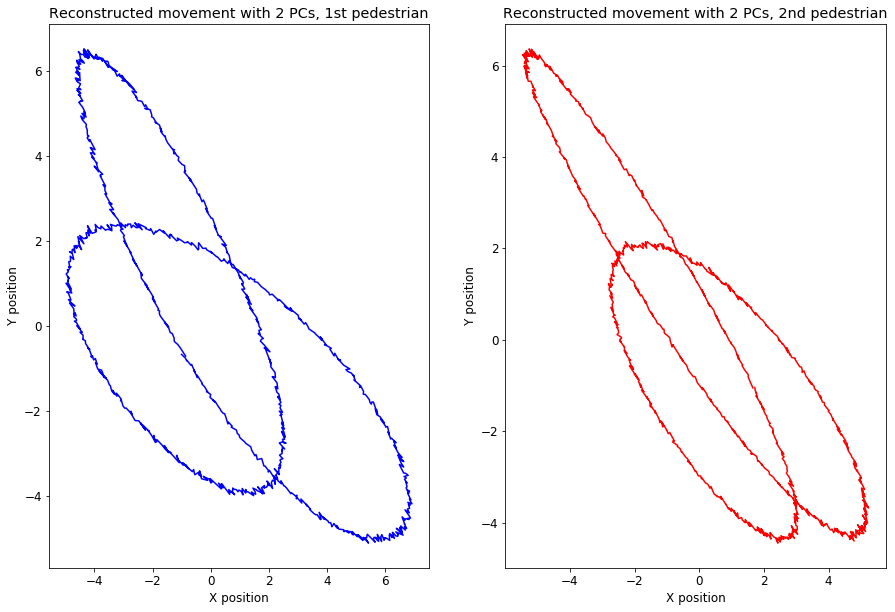

In [19]:
df_2 = pca_2d_reconstruction(df, 2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
ax1.plot(df_2[:, 0], df_2[:, 1], color='b')
ax1.set_title("Reconstructed movement with 2 PCs, 1st pedestrian")
ax1.set_xlabel("X position")
ax1.set_ylabel("Y position")
ax2.plot(df_2[:, 2], df_2[:, 3], color='r')
ax2.set_title("Reconstructed movement with 2 PCs, 2nd pedestrian")
ax2.set_xlabel("X position")
ax2.set_ylabel("Y position")
plt.show()

Energy:  85.87 %


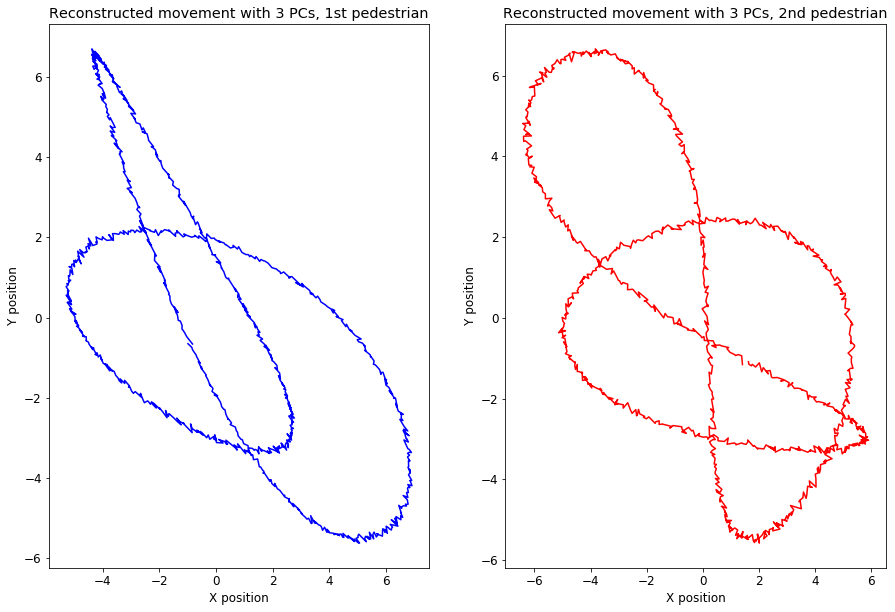

In [20]:
df_3 = pca_2d_reconstruction(df, 3)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
ax1.plot(df_3[:, 0], df_3[:, 1], color='b')
ax1.set_title("Reconstructed movement with 3 PCs, 1st pedestrian")
ax1.set_xlabel("X position")
ax1.set_ylabel("Y position")
ax2.plot(df_3[:, 2], df_3[:, 3], color='r')
ax2.set_title("Reconstructed movement with 3 PCs, 2nd pedestrian")
ax2.set_xlabel("X position")
ax2.set_ylabel("Y position")
plt.show()

Energy:  66.28 %


Text(0, 0.5, 'PC2')

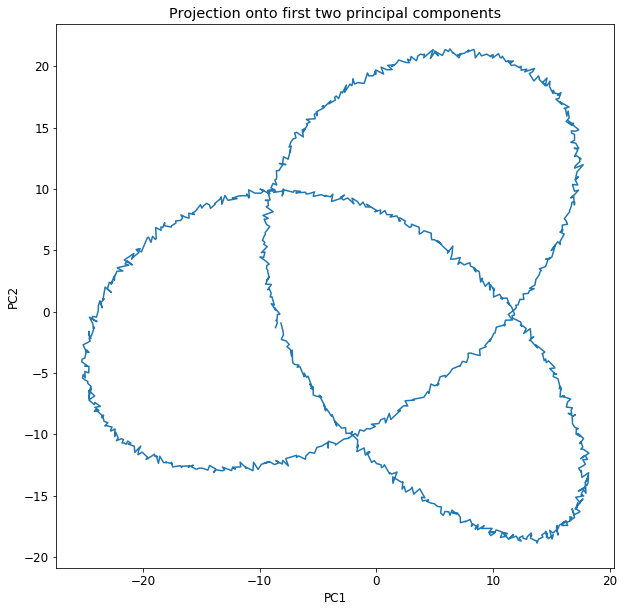

In [11]:
proj, _ = pca_projection(df, 2)
plt.figure(figsize=(10, 10))
plt.plot(proj[:, 0], proj[:, 1])
plt.title("Projection onto first two principal components")
plt.xlabel("PC1")
plt.ylabel("PC2")

In [8]:
df.shape

(1000, 30)

In [7]:
proj.shape

(1000, 30)

Energy:  85.87 %


Text(0.5, 0, 'PC3')

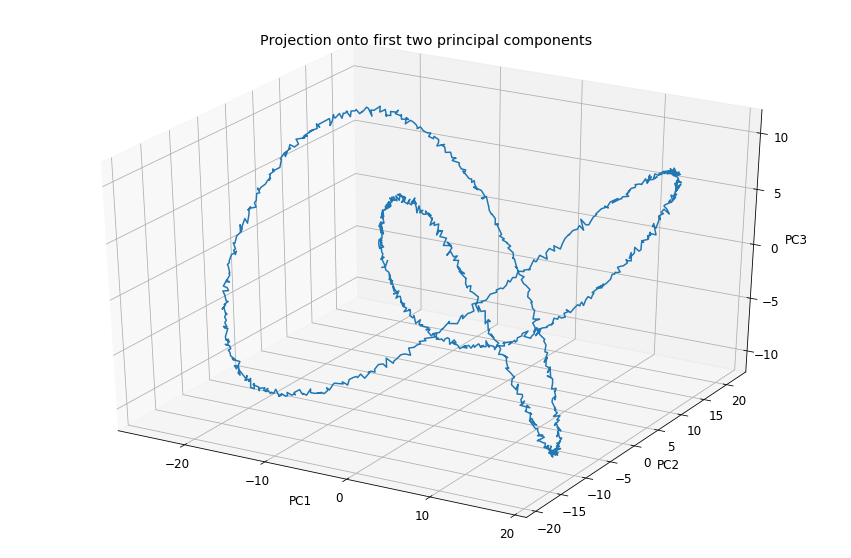

<Figure size 720x720 with 0 Axes>

In [22]:
from mpl_toolkits.mplot3d import Axes3D
proj, _ = pca_projection(df, 3)
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
plt.figure(figsize=(10, 10))
ax.plot(proj[:, 0], proj[:, 1], proj[:, 2])
ax.set_title("Projection onto first two principal components")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")